## Задача

**Имеется набор данных с химическими показателями состава вина. Эти наборы данных относятся к красным вариантам португальского вина "Винью Верде"за 2009 год. Методом дегустации, на основе сенсорных данных была произведена оценка качества вина по десятибальной шкале.**

*Необходимо проанализировать исходные данные и попробовать определить с помощью **статистики** какие показатели оказывают наиболее значимое влияние на конечную оценку. Или сенсорная оценка базируется на уникальных сочетаниях компонентов и не имеет закономерности?* 

**Загрузим необходимые библиотеки**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

*Имеется набор данных с химическими показателями состава вина. 
Эти наборы данных относятся к красным вариантам португальского вина "Винью Верде"за 2009 год. 
Методом дегустации, на основе сенсорных данных была произведена оценка качества вина по десятибальной шкале. 
Необходимо проанализировать исходные данные. Попробовать определить какие показатели оказывают 
наиболее значимое статистическое влияние на конечную оценку.*

### Решение

*Загрузим наши данные в датафреймы pandas*

In [4]:
# PATH = './winequality-red.csv'

In [5]:
# df = pd.read_csv(PATH, sep=',')
df = pd.read_csv('./winequality-red.csv', sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


*Проверим данные на пропуски.*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Из знаний о предметной области нам известно, что хорошее вино всегда отличается сбалансированным вкусом, 
то есть присущие ему терпкость, горечь, кислотность и сладость уравновешивают друг друга. 
Их пропорции зависят от стиля вина, технологии производства и сортов винограда.
Основные компоненты, из которых состоит вино, это: вода - 70-90%, этиловый спирт - 8-22%, сахар - 0.1-20% от объема,
различные кислоты - 0.3-1%, танины и вещества, отвечающие за цвет - до 0,4% (придают вину плотность), 
вкусо-ароматические соединения (до 0.2%), которые и определяют букет вина.
Из данных, представленных в датасете, наиболее явное влияние на оценку вина могли оказать: кислотность, остаточный сахар,
плотность, алкоголь.

*Попробуем определить корреляцию между показателями. 
Для этого построим матрицу корреляций ВСЕХ количественных переменных в нашем наборе данных.*

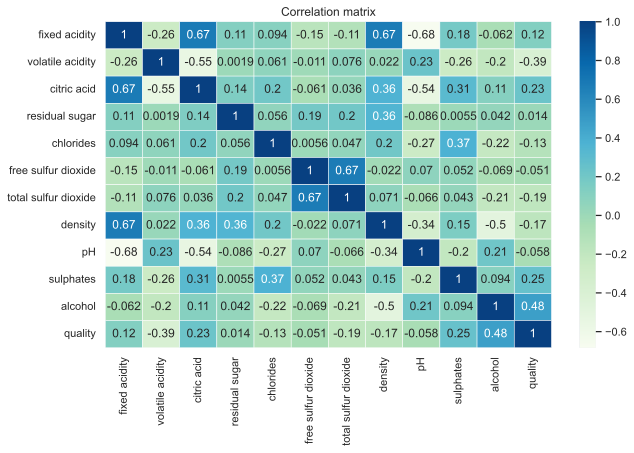

In [8]:
plt.figure(figsize = (10,6))

sns.set(font_scale=1)
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

*Из таблицы мы видим, корелляции фиксированной кислотности, остаточного сахара и плотности с показателем качества 
незначительны, а корелляция между алкоголем и качеством  наиболее высокая среди всех елементов (0.48). В то же время время 
имеется значительная корелляция между алкоголем и плотностью (0.5), а у плотности с кислотностью и остаточным сахаром.*

*Проверим распределение наших переменных*

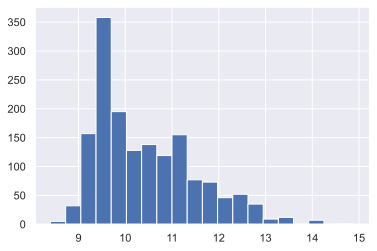

In [9]:
plt.hist(df['alcohol'], bins=20);
# plt.hist(df['density']);`

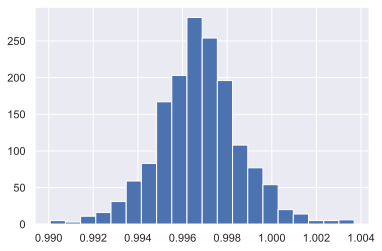

In [10]:
plt.hist(df['density'], bins=20);

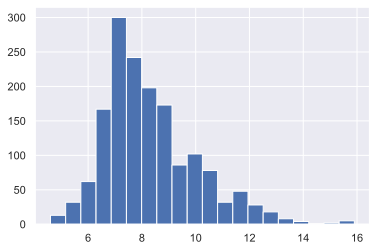

In [11]:
plt.hist(df['fixed acidity'], bins=20);

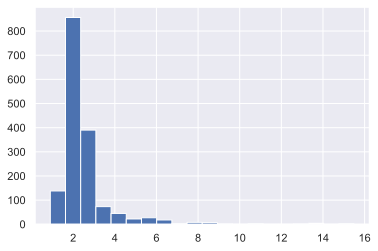

In [12]:
plt.hist(df['residual sugar'], bins=20);

*Из всех переменных только у плотности распределение походит на нормальное.*

*Посмотрим на количественное распределение проб по оценочным категориям:*

In [13]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

*Разделим наш датасет по категории "качество" на три группы и методом дисперсионного однофакторного анализа определим имеются ли различия 
между средними показателями в группах по нашим переменным. Для этого пробы, набравшие 3 и 4 балла выделим как явно неудавшиеся (bad), 
пробы набравшие 5 и 6 баллов отнесем к вину хорошего качества (good), категорию 7 и 8 баллов примем за отлично (exc).*

In [14]:
df_bad = df.loc[(df["quality"] <= 4)]
df_bad.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.9976,3.31,0.53,9.2,4


In [15]:
df_good = df.loc[(df["quality"] == 5) | (df["quality"] == 6)]
df_good.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df_exc = df.loc[(df["quality"] >= 7)]
df_exc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7


In [17]:
a_bad = df_bad["alcohol"]
a_good = df_good["alcohol"]
a_exc = df_exc["alcohol"]

In [18]:
stats.f_oneway(a_bad,a_good,a_exc)

F_onewayResult(statistic=158.77759051145458, pvalue=1.2916161190447622e-63)

In [19]:
d_bad = df_bad["density"]
d_good = df_good["density"]
d_exc = df_exc["density"]

In [20]:
stats.f_oneway(d_bad,d_good,d_exc)

F_onewayResult(statistic=18.765167046940665, pvalue=8.805121986215622e-09)

In [21]:
f_bad = df_bad["fixed acidity"]
f_good = df_good["fixed acidity"]
f_exc = df_exc["fixed acidity"]

In [22]:
stats.f_oneway(f_bad,f_good,f_exc)

F_onewayResult(statistic=13.168538421422843, pvalue=2.1264300676738575e-06)

In [23]:
r_bad = df_bad["residual sugar"]
r_good = df_good["residual sugar"]
r_exc = df_exc["residual sugar"]

In [24]:
stats.f_oneway(r_bad,r_good,r_exc)

F_onewayResult(statistic=2.3235803242594573, pvalue=0.09825353703123613)

*Статистически значимая разница средних значений в группах наблюдается только у остаточного сахара (pvalue=0.098). 
Само по себе количество остаточного сахара не оказывает сколько нибудь значительного влияния непосредственно на качество вина. 
Это то что осталось после брожения в процессе образования алкоголя. Однако различие его содержания в группах достаточно явное. 
Сделаем предположение: сахар вместе с кислотностью не напрямую влияет на качество, а посредством формирования показателя плотности, 
которая в сочетании с алкоголем прямо влияет на оценку вина.*

*Исследуем более подробно взаимодействие алкоголя и плотности. Для этого построим график:*

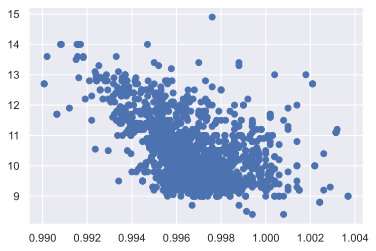

In [25]:
plt.scatter(df['density'], df['alcohol'])

*График в общем виде походит на линейный.
Коэффициент корреляции Пирсона r=-0.5, рассчитанный выше, так же говорит нам о возможном наличии связи между переменными.*

*Построим подель линейной регрессии:*

In [26]:
x1 = np.array(df['density'])

y1 = np.array(df['alcohol'])

x1.shape[0], y1.shape[0]

(1599, 1599)

In [27]:
b1 = np.cov(x1, y1, ddof=0)[0, 1] / np.var(x1, ddof=0) 
#Замечание. В данной формуле не нужно обязательно использовать смещённую или несмещённую оценку, 
#но важно, конечно, использовать один и тот же тип оценки и для ковариации, и для дисперсии.
b1

-280.16382306826256

In [28]:
b0 = y1.mean() - b1 * x1.mean()
b0

289.67534338256496

*Построим scatter plot по данным и отметим на нём прямую линейной регрессии*

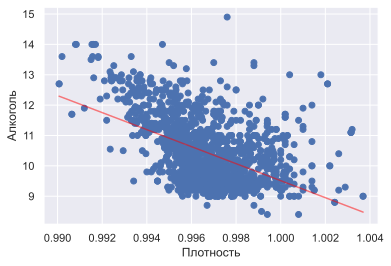

In [29]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Плотность')
plt.ylabel('Алкоголь');

In [30]:
z1 = b0 + b1 * x1

np.vstack([y1, z1]).T[:12]

array([[ 9.4       , 10.12788073],
       [ 9.8       , 10.40804455],
       [ 9.8       , 10.35201178],
       [ 9.8       , 10.07184796],
       [ 9.4       , 10.12788073],
       [ 9.4       , 10.12788073],
       [ 9.4       , 10.52011008],
       [10.        , 11.02440496],
       [ 9.5       , 10.40804455],
       [10.5       , 10.12788073],
       [ 9.2       , 10.66019199],
       [10.5       , 10.12788073]])

##### Оценим качество построенной модели:

In [31]:
#Коэффициент детерминации
R1 = 1 - (z1 - y1).var() / y1.var()
R1

0.24619436439710707

In [32]:
#Коэффициент корреляции
np.corrcoef(x1, y1)[0,1]

-0.4961797702417018

In [33]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [34]:
mean_approximation_error(y1, z1)

0.071100989153266

*Наша средняя ошибка аппроксимации  не превышает 10%, что говорит о том, что теоретические значения достаточно близки к тем, 
которые выдет модель линейной регрессии. Однако при этом необходимо обратить внимание на коэффициент детерминации R, 
который показывает, что модель описывает только четвертую часть данных.*

*ВЫВОД: полученные данные дают основание полагать, что имеющаяся взаимосвязь между соотношением плотности и содержанием алкоголя в 
дегустируемых пробах для португальского вина сорта "Винью Верде" **статистически значима**, и в пропорциях, рассчитанных моделью, позволяет с большей долей 
вероятности полагать, что вино получит более высокую оценку качества. 
При этом необходимо учесть, что вкусоароматические соединения, которые определяют букет и непосторимость вина, и так же способные 
оказывать влияние на конечную оценку, в анализе участия не принимали.*

**Оценка вина зависит от сочетания в определенных пропорциях его компонентов и имеет выраженную закономерность, которую возможно выявить методами статистики.**